In [2]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
size_2 = (6,4)
size_3 = (3.08, 2.31)
plt.rcParams['figure.figsize'] = size_2
plt.rcParams['font.size'] = 24
plt.rcParams['mathtext.fontset'] = 'stix'
plt.rcParams['font.family'] = 'STIXGeneral'
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
plt.rcParams['lines.linewidth'] = 1
plt.rcParams['lines.markeredgewidth'] = 1
plt.rcParams['lines.markersize'] = 5
plt.rcParams['lines.markerfacecolor'] = 'none'
plt.rcParams['legend.framealpha'] = 1
plt.rcParams['legend.loc'] = 'best'
plt.rcParams['legend.frameon'] = False
plt.rcParams['savefig.format'] = 'pdf'
plt.rcParams['savefig.bbox'] = 'tight'
plt.rcParams['xtick.major.pad'] = '7.5'
plt.rcParams['ytick.major.pad'] = '7.5'
plt.rcParams['axes.formatter.use_mathtext'] = True
try:
    from matplotlib_inline.backend_inline import set_matplotlib_formats
except:
    from IPython.display import set_matplotlib_formats
set_matplotlib_formats('svg')

In [4]:
def seir_decay_model(y,t,alpha,beta,kappa,gamma,Lambda,eta,xi,theta,N):
    S,P,E,I,Q,R,D = y
    if t < vaccine_date:
        alpha = 0
    dSdt = -beta*I*S/N-kappa*Q*S/N-alpha*S+ theta*(R+P)
    dPdt = alpha*S - theta*P
    dEdt = beta*I*S/N+kappa*Q*S/N-gamma*E
    dIdt = gamma*E-Lambda*I-eta*I
    dQdt = Lambda*I-eta*Q-xi*Q
    dRdt = eta*(Q+I)-theta*R
    dDdt = xi*(Q+I)
    return [dSdt,dPdt,dEdt,dIdt,dQdt,dRdt,dDdt]

In [5]:
#validation
alpha = 0.005 # vaccine rate
# vaccine_date = 100 # start date of vaccine 
beta_covid = 0.4  # transmission rate of susceptible 
kappa_covid = beta_covid/10 # transmission rate of quanrantined individuals
gamma_covid = 0.1 # latent rate
Lambda_covid = 0.1 # quarantine ratio
eta_covid = 0.1 # recovery rate
xi_covid = 0.0001 # death rate
theta_covid = 0 # recovery decay

Vaccinate_Date = np.arange(0,1010,10)

N = 1e6
I = 10
R = 0
E = 1
D = 0
Q = 0
P = 0
S = N-I-R-D-Q-P


In [6]:
data_save = []
New_cases = []
for index0,date in enumerate(Vaccinate_Date):
    vaccine_date = date
    initial_conditions_covid = [S,P,E,I,Q,R,D]
    t_length_covid = 1000
    t_covid = np.arange(1,t_length_covid+1,1)
    solution_covid = odeint(seir_decay_model, initial_conditions_covid, t_covid, args=(alpha,beta_covid,kappa_covid,gamma_covid,Lambda_covid,eta_covid,xi_covid,theta_covid,N))
    temp = solution_covid.T
    data_save.append(temp)
    new_cases = temp[2]*gamma_covid
    New_cases.append(new_cases)
New_cases = np.array(New_cases)
data_save = np.array(data_save)

In [7]:
len(data_save)

101

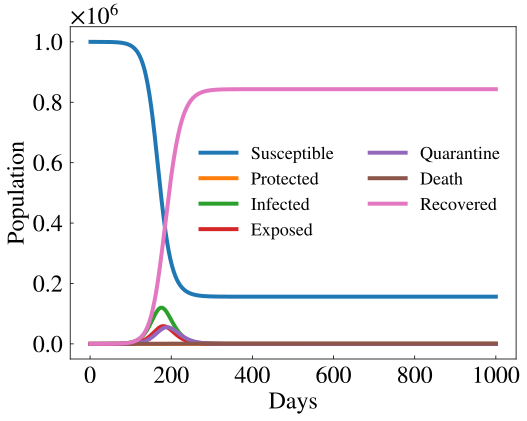

In [8]:
plt.figure(figsize=(8, 6))
linewidth = 4
vaccine_index = 100
plt.plot(t_covid, data_save[vaccine_index][0], label='Susceptible', color='C0',linewidth = linewidth)
plt.plot(t_covid, data_save[vaccine_index][1], label='Protected', color='C1',linewidth = linewidth)
plt.plot(t_covid, data_save[vaccine_index][2], label='Infected', color='C2',linewidth = linewidth)
plt.plot(t_covid, data_save[vaccine_index][3], label='Exposed', color='C3',linewidth = linewidth)
plt.plot(t_covid, data_save[vaccine_index][4], label='Quarantine', color='C4',linewidth = linewidth)
plt.plot(t_covid, data_save[vaccine_index][6], label='Death', color='C5',linewidth = linewidth)

plt.plot(t_covid, data_save[vaccine_index][5], label='Recovered', color='C6',linewidth = linewidth)
plt.xlabel('Days')
plt.ylabel('Population')
# plt.title('Start date: 06/13/2020')
plt.legend(ncol = 2,fontsize = 18)
# plt.yscale('log')
# plt.title('Date = '+str(Vaccinate_Date[vaccine_index]) )
# plt.grid()
# plt.show()
# plt.savefig('Comparison_absimmnue_vaccine_date'+str(Vaccinate_Date[vaccine_index])+'.pdf')

In [9]:
(data_save[:,1,250]+data_save[:,5,250])/N

array([0.71968721, 0.71089965, 0.70356013, 0.70025121, 0.70240713,
       0.71075744, 0.72478659, 0.74279708, 0.76260092, 0.78228699,
       0.80058932, 0.81684674, 0.83078344, 0.84228855, 0.85126255,
       0.85754965, 0.86097557, 0.86149305, 0.85933818, 0.85502791,
       0.84918058, 0.84233503, 0.83488223, 0.82707686, 0.81906648,
       0.81090781, 0.81008315, 0.81008315, 0.81008315, 0.81008315,
       0.81008315, 0.81008315, 0.81008315, 0.81008315, 0.81008315,
       0.81008315, 0.81008315, 0.81008315, 0.81008315, 0.81008315,
       0.81008315, 0.81008315, 0.81008315, 0.81008315, 0.81008315,
       0.81008315, 0.81008315, 0.81008315, 0.81008315, 0.81008315,
       0.81008315, 0.81008315, 0.81008315, 0.81008315, 0.81008315,
       0.81008315, 0.81008315, 0.81008315, 0.81008315, 0.81008315,
       0.81008315, 0.81008315, 0.81008315, 0.81008315, 0.81008315,
       0.81008315, 0.81008315, 0.81008315, 0.81008315, 0.81008315,
       0.81008315, 0.81008315, 0.81008315, 0.81008315, 0.81008

Text(0, 0.5, 'Immune Proportion')

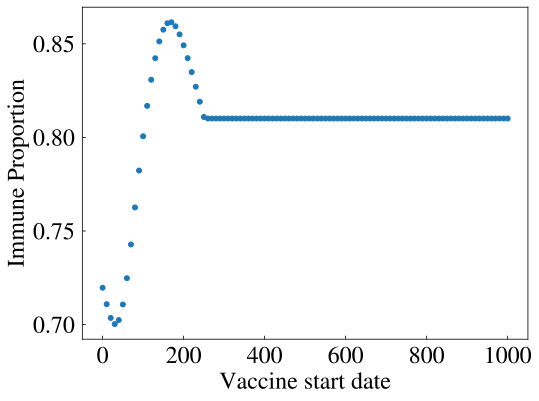

In [10]:
plt.figure(figsize=(8, 6))
linewidth = 4
plt.scatter(Vaccinate_Date,(data_save[:,1,250]+data_save[:,5,250])/N)
# plt.plot(t_covid,New_cases[15],linewidth = linewidth,label = 'Date = 150')
# plt.plot(t_covid,New_cases[10],linewidth = linewidth,label = 'Date = 100')
# plt.plot(t_covid,New_cases[5],linewidth = linewidth,label = 'Date = 50')
# plt.plot(t_covid,New_cases[0],linewidth = linewidth,label = 'Date = 0')
plt.xlabel('Vaccine start date')
plt.ylabel('Immune Proportion')
# plt.legend()
# plt.savefig('Comparison_immune_proportion.pdf')

Text(0, 0.5, 'New cases')

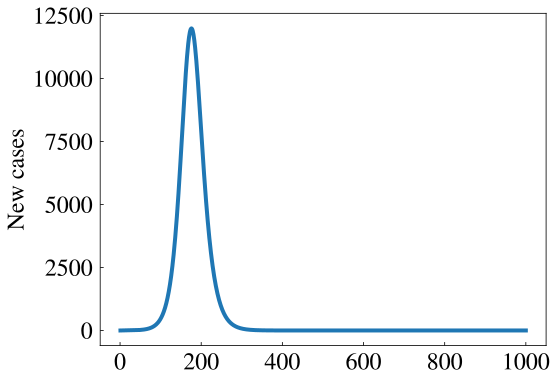

In [11]:
plt.figure(figsize=(8, 6))
linewidth = 4
plt.plot(t_covid,New_cases[-1],linewidth = linewidth,label = 'No vaccine')
# plt.plot(t_covid,New_cases[15],linewidth = linewidth,label = 'Date = 150')
# plt.plot(t_covid,New_cases[10],linewidth = linewidth,label = 'Date = 100')
# plt.plot(t_covid,New_cases[5],linewidth = linewidth,label = 'Date = 50')
# plt.plot(t_covid,New_cases[0],linewidth = linewidth,label = 'Date = 0')
# plt.xlabel('Days')
plt.ylabel('New cases')
# plt.title('Start date: 12/15/2021')
# plt.legend()
# plt.savefig('Comparison_absimmune_strong_newcases.pdf')